# Problem Statement

The objective of this assignment is to evaluate your ability to analyze raw data and provide insights from it. You will be required to clean, analyze and visualize associate performance data and provide actionable insights and recommendations for the Business Development Team based on the data. You will also be expected to make tentative projections for the next month.

# Import Required Libraries

In [214]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

In [215]:
data = pd.read_excel("Data_Assignment.xlsx",sheet_name = None)
data

{'Associate ABC':          Date  No of Leads  Time Spent on LG (in mins)
 0  2023-01-09          2.0                       300.0
 1  2023-01-10          1.0                       300.0
 2  2023-01-11          5.0                       300.0
 3  2023-01-12          4.0                       300.0
 4  2023-01-13          5.0                       300.0
 ..        ...          ...                         ...
 77 2023-02-06          NaN                         4.0
 78 2023-02-07          NaN                         2.0
 79 2023-02-08          NaN                         0.0
 80 2023-02-09          NaN                         0.0
 81 2023-02-10          NaN                        14.0
 
 [82 rows x 3 columns],
 'Associate XYZ':          Date  No of Leads  Time Spent on LG (in mins)
 0  2023-01-09         10.0                       180.0
 1  2023-01-10         15.0                       300.0
 2  2023-01-11         11.0                       300.0
 3  2023-01-12         11.0                 

In [216]:
abc = data['Associate ABC']
abc

,Date,No of Leads,Time Spent on LG (in mins)
0,2023-01-09,2.0,300.0
1,2023-01-10,1.0,300.0
2,2023-01-11,5.0,300.0
3,2023-01-12,4.0,300.0
4,2023-01-13,5.0,300.0
...,...,...,...
77,2023-02-06,NaN,4.0
78,2023-02-07,NaN,2.0
79,2023-02-08,NaN,0.0
80,2023-02-09,NaN,0.0


# Check Null Values

In [217]:
abc.isnull().sum()

Date                           0
No of Leads                   34
Time Spent on LG (in mins)    24
dtype: int64

# Handling Missing Values

In [218]:
abc = abc.dropna() 
abc = abc[(abc != 0).all(1)]  # Drop rows with 0 values

In [219]:
abc.isnull().sum()

Date                          0
No of Leads                   0
Time Spent on LG (in mins)    0
dtype: int64

In [220]:
abc.shape

(45, 3)

In [221]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 67
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        45 non-null     datetime64[ns]
 1   No of Leads                 45 non-null     float64       
 2   Time Spent on LG (in mins)  45 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.4 KB


# Changing Data Types

In [222]:
abc['No of Leads'] = abc['No of Leads'].astype(int)
abc['Time Spent on LG (in mins)'] = abc['Time Spent on LG (in mins)'].astype(int)

In [223]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 67
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        45 non-null     datetime64[ns]
 1   No of Leads                 45 non-null     int32         
 2   Time Spent on LG (in mins)  45 non-null     int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 1.1 KB


# Statistics of the data

In [224]:
abc.describe()

,No of Leads,Time Spent on LG (in mins)
count,45.000000,45.000000
mean,6.977778,356.666667
std,3.893403,100.904996
min,1.000000,60.000000
25%,4.000000,300.000000
50%,7.000000,300.000000
75%,10.000000,400.000000
max,15.000000,540.000000


# Boxplot to check outliers

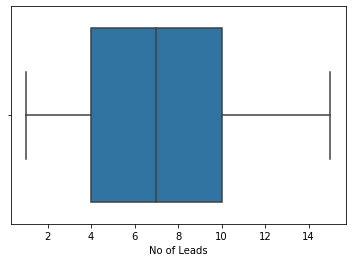

In [225]:
sns.boxplot(x=abc['No of Leads'])
plt.show()

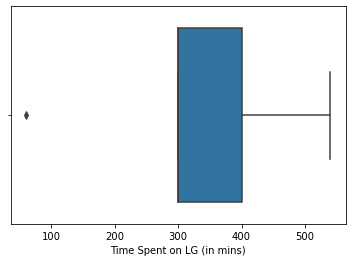

In [226]:
sns.boxplot(x=abc['Time Spent on LG (in mins)'])
plt.show()

# Inter Quarterile Range (IQR)

In [227]:
Q1 = abc['Time Spent on LG (in mins)'].quantile(0.25)
Q3 = abc['Time Spent on LG (in mins)'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('upper_bound',upper_bound)
print('lower_bound',lower_bound)


upper_bound 550.0
lower_bound 150.0


# Capping the outliers

In [228]:
new_abc_cap = abc.copy()

new_abc_cap['Time Spent on LG (in mins)'] = np.where(
    new_abc_cap['Time Spent on LG (in mins)']>upper_bound,
    upper_bound,
    np.where(
        new_abc_cap['Time Spent on LG (in mins)']<lower_bound,
        lower_bound,
        new_abc_cap['Time Spent on LG (in mins)']
    )
)

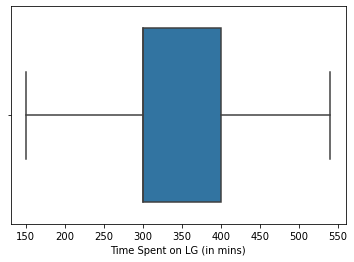

In [229]:
sns.boxplot(x=new_abc_cap['Time Spent on LG (in mins)'])
plt.show()

In [230]:
xyz = data['Associate XYZ']
xyz

,Date,No of Leads,Time Spent on LG (in mins)
0,2023-01-09,10.0,180.0
1,2023-01-10,15.0,300.0
2,2023-01-11,11.0,300.0
3,2023-01-12,11.0,300.0
4,2023-01-13,13.0,300.0
...,...,...,...
56,2023-03-06,12.0,420.0
57,2023-03-07,NaN,NaN
58,2023-03-08,10.0,420.0
59,2023-03-09,9.0,420.0


In [231]:
xyz.isnull().sum()

Date                           0
No of Leads                   20
Time Spent on LG (in mins)    20
dtype: int64

In [232]:
xyz = xyz.dropna()
xyz = xyz[(xyz != 0).all(1)]
xyz.isnull().sum()

Date                          0
No of Leads                   0
Time Spent on LG (in mins)    0
dtype: int64

In [233]:
xyz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 60
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        41 non-null     datetime64[ns]
 1   No of Leads                 41 non-null     float64       
 2   Time Spent on LG (in mins)  41 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.3 KB


In [234]:
xyz['No of Leads'] = xyz['No of Leads'].astype(int)
xyz['Time Spent on LG (in mins)'] = xyz['Time Spent on LG (in mins)'].astype(int)

In [235]:
xyz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 60
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        41 non-null     datetime64[ns]
 1   No of Leads                 41 non-null     int32         
 2   Time Spent on LG (in mins)  41 non-null     int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 984.0 bytes


In [236]:
xyz.describe()

,No of Leads,Time Spent on LG (in mins)
count,41.000000,41.000000
mean,10.853659,387.073171
std,2.555005,82.651192
min,7.000000,180.000000
25%,9.000000,360.000000
50%,10.000000,420.000000
75%,13.000000,420.000000
max,15.000000,600.000000


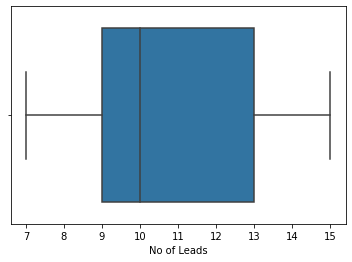

In [237]:
sns.boxplot(x=xyz['No of Leads'])
plt.show()

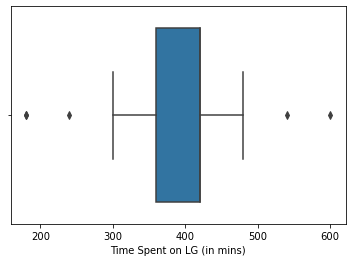

In [238]:
sns.boxplot(x=xyz['Time Spent on LG (in mins)'])
plt.show()

In [239]:
Q1 = xyz['Time Spent on LG (in mins)'].quantile(0.25)
Q3 = xyz['Time Spent on LG (in mins)'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [240]:
print('upper_bound',upper_bound)
print('lower_bound',lower_bound)

upper_bound 510.0
lower_bound 270.0


In [241]:
xyz[xyz['Time Spent on LG (in mins)']>upper_bound]

,Date,No of Leads,Time Spent on LG (in mins)
32,2023-02-10,9,540
49,2023-02-27,15,600


In [242]:
new_xyz_cap = xyz.copy()

new_xyz_cap['Time Spent on LG (in mins)'] = np.where(
    new_xyz_cap['Time Spent on LG (in mins)']>upper_bound,
    upper_bound,
    np.where(
        new_xyz_cap['Time Spent on LG (in mins)']<lower_bound,
        lower_bound,
        new_xyz_cap['Time Spent on LG (in mins)']
    )
)


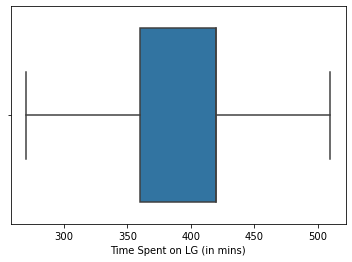

In [243]:
sns.boxplot(x=new_xyz_cap['Time Spent on LG (in mins)'])
plt.show()

In [244]:
klm = data['Associlate KLM']
klm

,Date,No of Leads,Time Spent on LG (in mins)
0,2023-01-09,6.0,540.0
1,2023-01-10,9.0,540.0
2,2023-01-11,NaN,NaN
3,2023-01-12,11.0,540.0
4,2023-01-13,16.0,540.0
...,...,...,...
119,2023-05-08,10.0,420.0
120,2023-05-09,9.0,540.0
121,2023-05-10,8.0,360.0
122,2023-05-11,12.0,420.0


In [245]:
klm.isnull().sum()

Date                           0
No of Leads                   14
Time Spent on LG (in mins)    17
dtype: int64

In [246]:
klm = klm.dropna()
klm = klm[(klm != 0).all(1)]
klm.isnull().sum()

Date                          0
No of Leads                   0
Time Spent on LG (in mins)    0
dtype: int64

In [247]:
klm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 123
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        107 non-null    datetime64[ns]
 1   No of Leads                 107 non-null    float64       
 2   Time Spent on LG (in mins)  107 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.3 KB


In [248]:
klm['No of Leads'] = klm['No of Leads'].astype(int)
klm['Time Spent on LG (in mins)'] = klm['Time Spent on LG (in mins)'].astype(int)

In [249]:
klm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 123
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        107 non-null    datetime64[ns]
 1   No of Leads                 107 non-null    int32         
 2   Time Spent on LG (in mins)  107 non-null    int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 2.5 KB


In [250]:
klm.describe()

,No of Leads,Time Spent on LG (in mins)
count,107.000000,107.000000
mean,9.850467,384.766355
std,4.147752,99.464090
min,2.000000,180.000000
25%,6.000000,300.000000
50%,10.000000,360.000000
75%,13.000000,450.000000
max,23.000000,540.000000


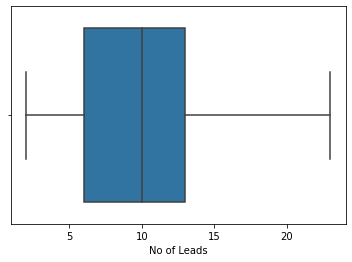

In [251]:
sns.boxplot(x=klm['No of Leads'])
plt.show()

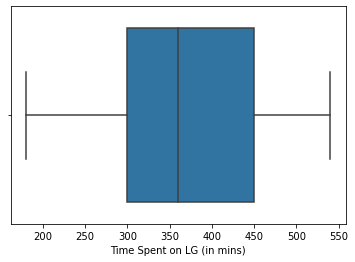

In [252]:
sns.boxplot(x=klm['Time Spent on LG (in mins)'])
plt.show()

In [253]:
klm.to_csv('klm_data.csv', index=False)

In [254]:
abc.to_csv('abc_data.csv', index=False)

In [255]:
xyz.to_csv('xyz_data.csv', index=False)

In [256]:
df1 = pd.read_csv('abc_data.csv')

# Read data from the second CSV file
df2 = pd.read_csv('xyz_data.csv')

# Read data from the third CSV file
df3 = pd.read_csv('klm_data.csv')

# Create a Pandas Excel writer using XlsxWriter as the engine
with pd.ExcelWriter('C:/Users/sonia/Downloads/Antartica_Cleaned_Data/Final_Data.xlsx', engine='xlsxwriter') as writer:
    # Write each DataFrame to a different sheet in the Excel file
    df1.to_excel(writer, sheet_name='abc', index=False)
    df2.to_excel(writer, sheet_name='xyz', index=False)
    df3.to_excel(writer, sheet_name='klm', index=False)